In [ ]:
#install and import dependencies
!pip install pomegranate
!apt install libgraphviz-dev
!pip install pygraphviz

import math
from pomegranate import *
import matplotlib as plt
import pygraphviz as pyg

E: dpkg was interrupted, you must manually run 'dpkg --configure -a' to correct the problem. 
     |████████████████████████████████| 118 kB 26.7 MB/s 
  Created wheel for pygraphviz: filename=pygraphviz-1.7-cp37-cp37m-linux_x86_64.whl size=165748 sha256=780517b461775a7e9c4fb013d8f0ec864f211ddab7b2c10bb3066f9607ccbf58
  Stored in directory: /root/.cache/pip/wheels/8c/bc/0c/ac35392b72556e75107ff610cb31b313e8471918a6d280e34c
Successfully built pygraphviz


In [ ]:
#initializing node variables
place = DiscreteDistribution( { 'TamilNadu': 1./2, 'Kashmir': 1./2} )
season = DiscreteDistribution( { 'Autumn': 1./2, 'Spring': 1./2} )
print(place)
print(season)

{
    "class" : "Distribution",
    "dtype" : "str",
    "name" : "DiscreteDistribution",
    "parameters" : [
        {
            "TamilNadu" : 0.5,
            "Kashmir" : 0.5
        }
    ],
    "frozen" : false
}
{
    "class" : "Distribution",
    "dtype" : "str",
    "name" : "DiscreteDistribution",
    "parameters" : [
        {
            "Autumn" : 0.5,
            "Spring" : 0.5
        }
    ],
    "frozen" : false
}


In [ ]:
#defining conditional probability tables 
fruit =ConditionalProbabilityTable(
[[ 'TamilNadu', 'Autumn', 'Apple', 0.3 ],
[ 'TamilNadu', 'Autumn', 'Banana', 0.7 ],
[ 'TamilNadu', 'Spring', 'Apple', 0.1 ],
[ 'TamilNadu', 'Spring', 'Banana', 0.9 ],
[ 'Kashmir', 'Autumn', 'Apple', 0.8 ],
[ 'Kashmir', 'Autumn', 'Banana', 0.2 ],
[ 'Kashmir', 'Spring', 'Apple', 0.4 ],
[ 'Kashmir', 'Spring', 'Banana', 0.6 ]], [place, season] )

color =ConditionalProbabilityTable(
[[ 'Apple', 'Red', 0.6 ],
[ 'Apple', 'Green', 0.2 ],
[ 'Apple', 'Yellow', 0.2 ],
[ 'Banana', 'Red', 0.1 ],
[ 'Banana', 'Green', 0.4 ],
[ 'Banana', 'Yellow', 0.5 ]], [fruit] )

shape =ConditionalProbabilityTable(
[[ 'Apple', 'Round', 0.8 ],
[ 'Apple', 'Long', 0.2 ],
[ 'Banana', 'Round', 0.1 ],
[ 'Banana', 'Long', 0.9 ]], [fruit] )


print("fruit CPT")
print(fruit)
print()
print("color CPT")
print(color)
print()
print("shape CPT")
print(shape)
print()

fruit CPT
TamilNadu	Autumn	Apple	0.3
TamilNadu	Autumn	Banana	0.7
TamilNadu	Spring	Apple	0.10000000000000002
TamilNadu	Spring	Banana	0.9
Kashmir	Autumn	Apple	0.8
Kashmir	Autumn	Banana	0.2
Kashmir	Spring	Apple	0.4
Kashmir	Spring	Banana	0.6

color CPT
Apple	Red	0.6
Apple	Green	0.2
Apple	Yellow	0.2
Banana	Red	0.10000000000000002
Banana	Green	0.4
Banana	Yellow	0.5

shape CPT
Apple	Round	0.8
Apple	Long	0.2
Banana	Round	0.10000000000000002
Banana	Long	0.9



In [ ]:
#defining states in the bayesian model
s_place = State( place, name="Place" )
s_season = State( season, name="Season" )
s_fruit = State( fruit, name="Fruit" )
s_color = State( color, name="Color" )
s_shape = State( shape, name="Shape" )

#model creation
model = BayesianNetwork("Fruit Characteristics prediction")

# Adding states to the network 
model.add_states(s_place, s_season, s_fruit,s_color,s_shape)

#Adding edges to the network
model.add_edge(s_place, s_fruit)
model.add_edge(s_season, s_fruit)
model.add_edge(s_fruit, s_color)
model.add_edge(s_fruit, s_shape)

#finalizing the topology
model.bake()

#model is created


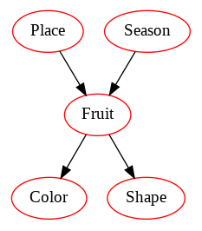

In [ ]:
#visibilizing the model
model.plot()

In [ ]:
#part 1
#kashmir and Tamilnadu are equiprobable. Also, Autumn and Spring are equiprobable
model.predict_proba([[None,None,None,None,None]])

[array([{
            "class" : "Distribution",
            "dtype" : "str",
            "name" : "DiscreteDistribution",
            "parameters" : [
                {
                    "TamilNadu" : 0.5,
                    "Kashmir" : 0.5000000000000001
                }
            ],
            "frozen" : false
        }                                         ,
        {
            "class" : "Distribution",
            "dtype" : "str",
            "name" : "DiscreteDistribution",
            "parameters" : [
                {
                    "Autumn" : 0.5,
                    "Spring" : 0.5
                }
            ],
            "frozen" : false
        }                                   ,
        {
            "class" : "Distribution",
            "dtype" : "str",
            "name" : "DiscreteDistribution",
            "parameters" : [
                {
                    "Apple" : 0.4000000000000003,
                    "Banana" : 0.5999999999999996
          

In [ ]:
#part2 
#assuming the place is kashmir and finding the probabilities for other nodes
model.predict_proba([["Kashmir", None, None,None,None]])

[array(['Kashmir', {
                       "class" : "Distribution",
                       "dtype" : "str",
                       "name" : "DiscreteDistribution",
                       "parameters" : [
                           {
                               "Autumn" : 0.5,
                               "Spring" : 0.4999999999999999
                           }
                       ],
                       "frozen" : false
                   }                                        ,
        {
            "class" : "Distribution",
            "dtype" : "str",
            "name" : "DiscreteDistribution",
            "parameters" : [
                {
                    "Apple" : 0.5999999999999999,
                    "Banana" : 0.4000000000000001
                }
            ],
            "frozen" : false
        }                                        ,
        {
            "class" : "Distribution",
            "dtype" : "str",
            "name" : "DiscreteDistributio

In [ ]:
#part5
#assuming the place is kashmir and color is Yellow then finding the probabilities for other nodes
model.predict_proba([["Kashmir", None, None,"Yellow","Round"]])

[array(['Kashmir', {
                       "class" : "Distribution",
                       "dtype" : "str",
                       "name" : "DiscreteDistribution",
                       "parameters" : [
                           {
                               "Autumn" : 0.5948275862068964,
                               "Spring" : 0.40517241379310365
                           }
                       ],
                       "frozen" : false
                   }                                         ,
        {
            "class" : "Distribution",
            "dtype" : "str",
            "name" : "DiscreteDistribution",
            "parameters" : [
                {
                    "Apple" : 0.8275862068965515,
                    "Banana" : 0.1724137931034485
                }
            ],
            "frozen" : false
        }                                        , 'Yellow', 'Round'],
       dtype=object)]